In [15]:
%load_ext autoreload
%autoreload 2
import numpy as np
from MachineLearning.GM import gmm
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
np.random.seed(42)

In [17]:
def kmeans_plus2(x_train, n_clusters):
    c = x_train[np.random.choice(x_train.shape[0], 1, replace=False)]
    for i in range(1, n_clusters):
        dd = np.sqrt(((x_train - c[:, np.newaxis])**2).sum(axis=2)).T.min(axis=1)
        dd = dd**2
        p_dist = dd / dd.sum()
        new_c = x_train[np.random.choice(x_train.shape[0], 1, p=p_dist)]
        c = np.append(c, new_c, axis=0)
    return c

In [18]:
x_train = np.loadtxt('datasets/toydata.txt')

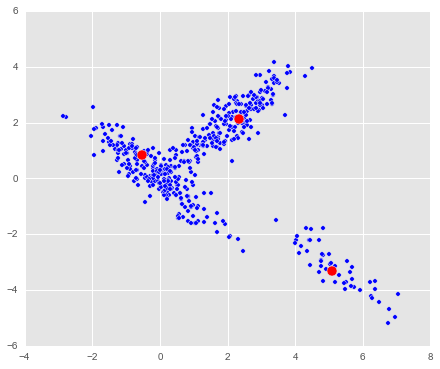

In [19]:
gm = gmm.GMM()
c = kmeans_plus2(x_train, 3)
n_clusters = 3
fig = plt.figure(figsize=(16,6))
plt.subplot(121)
plt.scatter(x_train[:, 0], x_train[:, 1])
plt.scatter(c[:, 0], c[:, 1], c='r', s=100)

In [20]:
gm.mu = c
result = gm.fit(x_train)

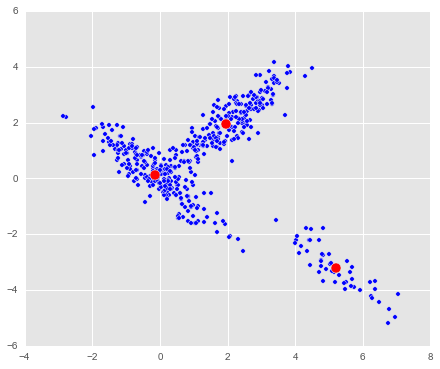

In [21]:
n_clusters = 3
c = result[1]
fig = plt.figure(figsize=(16,6))
plt.subplot(121)
plt.scatter(x_train[:, 0], x_train[:, 1])
plt.scatter(c[:, 0], c[:, 1], c='r', s=100)

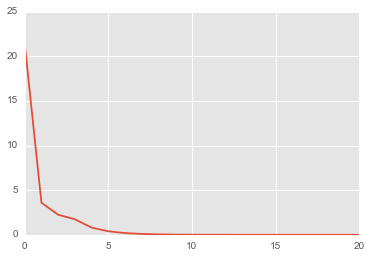

In [22]:
plt.figure()
plt.plot(range(len(gm.e)), gm.e)

NameError: name 'kmeans' is not defined

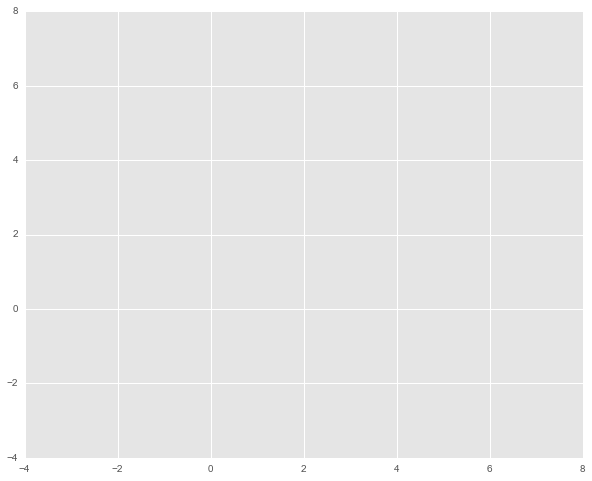

In [23]:
from JSAnimation import IPython_display
from matplotlib import animation

# create a simple animation
fig = plt.figure(figsize=(10,8))
ax = plt.axes(xlim=(-4, 8), ylim=(-4, 8))
n_clusters = 3
c = kmeans.random_centroids(x_train, n_clusters)

def init():
    return

def animate(i):
    global c
    
    ax.cla()
    ax.scatter(x_train[:, 0], x_train[:, 1])
    ax.scatter(c[:, 0], c[:, 1], c='r', s=100)
    c = kmeans.update_centroids(x_train, pc[0], n_clusters)
    return 

animation.FuncAnimation(fig, animate, init_func=init,
                        frames=20, interval=200, blit=True)